In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

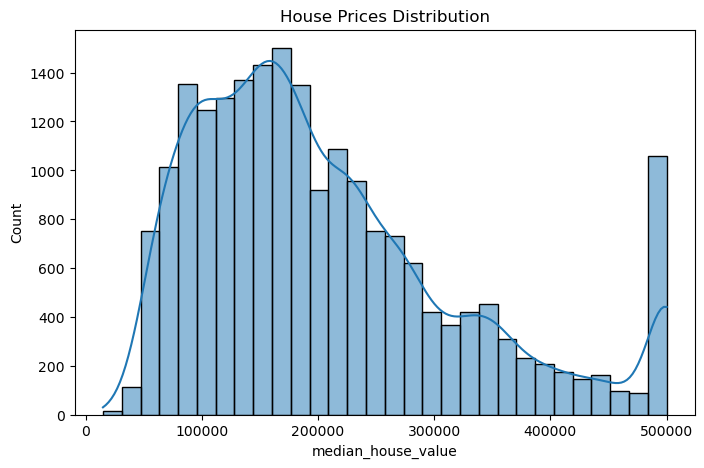

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title("House Prices Distribution")
plt.show()

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

ValueError: could not convert string to float: 'NEAR BAY'

<Figure size 1000x600 with 0 Axes>

In [5]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [8]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND


In [9]:
y_train

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [10]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

In [11]:
#Prepprocessing Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [12]:
categorical_trnasformer = Pipeline(steps=[
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
numeric_features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms',
                    'population','households','median_income']
categorical_features = ['ocean_proximity']
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_trnasformer, categorical_features)
])

In [14]:
lr = Pipeline(steps=[('preprocessor',preprocessor),('model',LinearRegression())])
lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('model', LinearRegression())])

In [18]:
y_pred_lr = lr.predict(X_test)
 
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression R2 Score: 0.6253611975153133


In [19]:
dt = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor(max_depth=10))])
dt.fit(X_train, y_train)
 
y_pred_dt = dt.predict(X_test)
 
print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree R2 Score: 0.7113384068100941


In [20]:
rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(n_estimators=100, max_depth=10))])
rf.fit(X_train, y_train)
 
y_pred_rf = rf.predict(X_test)
 
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest R2 Score: 0.7804175467294407


In [21]:
gb = Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5))])
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting R2 Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting R2 Score: 0.8105685711524575


C:\Users\karan\AppData\Local\Temp\ipykernel_19080\1321890114.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='coolwarm')


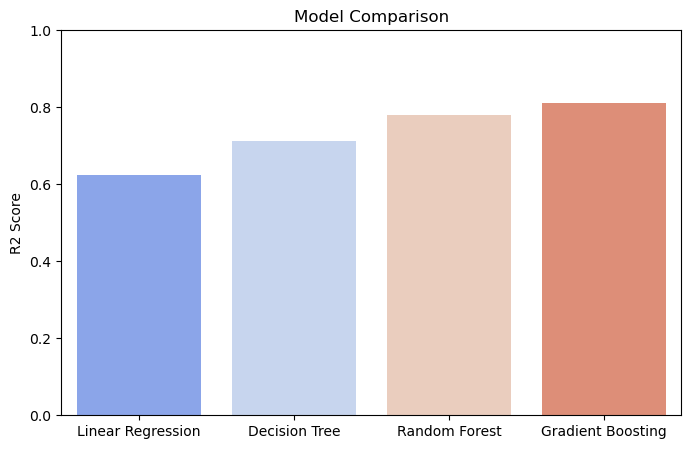

In [22]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_gb)]
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=scores, palette='coolwarm')
plt.ylabel("R2 Score")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()

In [24]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Model Performance:")
    print("Mean Absolute Error:", (mean_absolute_error(y_test, y_pred))*100)
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
evaluate_model(lr, X_test, y_test, "Linear Regression")
evaluate_model(dt, X_test, y_test, "Decision Tree")
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(gb, X_test, y_test, "Gradient Boosting")


Linear Regression Model Performance:
Mean Absolute Error: 50697.71947674418
Mean Squared Error: 4909300503.733527
Root Mean Squared Error: 70066.40067631223
R2 Score: 0.6253611975153133

Decision Tree Model Performance:
Mean Absolute Error: 40743.83933917725
Mean Squared Error: 3782647433.8937497
Root Mean Squared Error: 61503.23108499056
R2 Score: 0.7113384068100941

Random Forest Model Performance:
Mean Absolute Error: 36005.828572069804
Mean Squared Error: 2877428182.2990365
Root Mean Squared Error: 53641.664611559514
R2 Score: 0.7804175467294407

Gradient Boosting Model Performance:
Mean Absolute Error: 33497.77078407366
Mean Squared Error: 2482326451.2282186
Root Mean Squared Error: 49822.95104897158
R2 Score: 0.8105685711524575
